# Выделение признаков

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# выделение признаков при помощи TSFresh
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

# Создаём временные ряды и визуализируем их

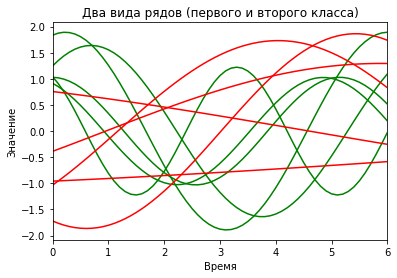

data.shape = (122000, 4)
data.id.nunique() = 2000


,t,y,class,id
0,0.0,3.245872,1,0
1,0.1,3.348260,1,0
2,0.2,3.436487,1,0


In [6]:
N = 1000 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    A = 1 + random.random()        ## амплитуда
    w = 1 + random.random()        ## частота
    ph = np.pi * random.random()   ## фаза
    
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.sin(t*w + ph)  ## значения временного ряда
    df['class'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = pd.concat([data,df],axis=0)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['class'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = pd.concat([data,df],axis=0)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

# Выделение признаков при помощи TSFresh
http://tsfresh.readthedocs.io/en/latest/

In [7]:
def featuresTSFresh(data):    

    ## список фич (см. документацию по TSFresh: https://media.readthedocs.org/pdf/tsfresh/latest/tsfresh.pdf)
    extraction_settings = \
    {
        ## признак: параметр
        "maximum": None,
        "mean": None,
        "minimum": None,
        "median": None,
        "standard_deviation": None,
        "binned_entropy": [{"max_bins" : 10}],
        "count_above_mean": None,
        "count_below_mean": None,
        "first_location_of_maximum": None,
        "first_location_of_minimum": None,
        "mean_change": None,
        "sum_values": None,
        "kurtosis": None,
        "skewness": None,
        "abs_energy": None        
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    
    ## вытаскиваем колонку id из индекса 
    featuresDF = featuresDF.reset_index()

    return featuresDF

## убираем колонку class из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data.drop('class', axis=1))

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1

print('data.shape =', data.shape)
print('features.shape =', features.shape)
features.head(3)

Feature Extraction: 100%|██████████| 20/20 [00:05<00:00,  3.39it/s]

data.shape = (122000, 4)
features.shape = (2000, 17)



C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_26344\2026878787.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label'].iloc[N:] = 1


,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label
0,0,3.638476,1.993396,0.361503,2.021114,1.159167,2.177507,31.0,30.0,0.114754,0.622951,-0.002539,121.597163,-1.522487,0.010053,324.355057,0
1,1,3.222351,1.831576,0.776047,1.756307,0.828757,2.185494,27.0,34.0,0.540984,0.836066,-0.017766,111.726131,-1.365224,0.291575,246.532037,0
2,2,3.891279,2.096981,0.107249,2.144667,1.367380,2.146856,31.0,30.0,0.983607,0.508197,0.000943,127.915835,-1.548907,-0.083391,382.290408,0


# Машинное обучение

trainSet.shape = (1200, 17)
testSet.shape  = (800, 17)

Value counts train:
 label
1    603
0    597
Name: count, dtype: int64

Value counts test:
 label
0    403
1    397
Name: count, dtype: int64


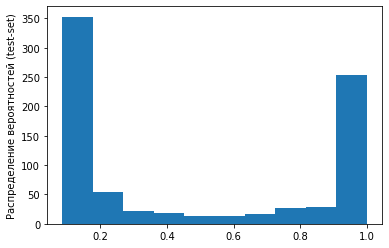

                          features   importances
12                     y__kurtosis  5.348543e-01
9     y__first_location_of_minimum  2.764692e-01
5   y__binned_entropy__max_bins_10  9.558191e-02
4            y__standard_deviation  3.486869e-02
8     y__first_location_of_maximum  2.662037e-02
10                  y__mean_change  8.148802e-03
1                          y__mean  8.034701e-03
11                   y__sum_values  6.024088e-03
3                        y__median  4.364598e-03
14                   y__abs_energy  2.369408e-03
13                     y__skewness  2.036991e-03
0                       y__maximum  2.565418e-04
7              y__count_below_mean  2.391088e-04
2                       y__minimum  1.312449e-04
6              y__count_above_mean  9.862528e-18

   Pos  Neg
0  394    9
1   63  334

AUC = 0.960  Точность = 0.910



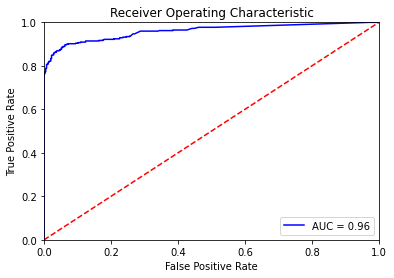

In [11]:
## разбиваем выделенные фичи на тренировочный и тестовый наборы 
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['index', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()



from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

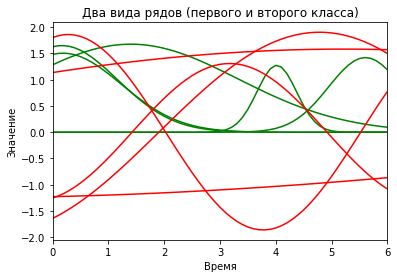

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [13]:
N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()        
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = pd.concat([data,df],axis=0)          ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = pd.concat([data,df],axis=0)            ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

Задание 8.19.1

Посчитайте максимальное, минимальное, среднее и медианное значение для каждого временного ряда. Хинт: используйте функцию pandas.DataFrame.groupby(). Укажите эти значения округлённые до второго знака после запятой для временного ряда с id = 3.

In [24]:
data.groupby(by='id').min()

,t,y,label
id,,,
0,0.0,1.957849,1
1,0.0,2.052910,1
2,0.0,1.957849,1
3,0.0,1.957850,1
4,0.0,1.957850,1
...,...,...,...
195,0.0,0.714004,0
196,0.0,0.847096,0
197,0.0,0.828983,0


In [26]:
data.groupby(by='id').median()

,t,y,label
id,,,
0,3.0,1.957977,1.0
1,3.0,3.143508,1.0
2,3.0,1.958426,1.0
3,3.0,1.998222,1.0
4,3.0,1.986966,1.0
...,...,...,...
195,3.0,1.008454,0.0
196,3.0,0.921486,0.0
197,3.0,1.257858,0.0


Задание 8.19.2

Создайте дейтафрейм features с посчитанными фичами для каждого из рядов, содержащий, помимо фич, колонки:

'id', 'label'.

Запустите алгоритм в следующей ячейке. Укажите количество false negatives.

In [28]:
## убираем колонку label из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data.drop('label', axis=1))

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1

print('data.shape =', data.shape)
print('features.shape =', features.shape)
features.head(3)

Feature Extraction: 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]

data.shape = (12200, 4)
features.shape = (200, 17)



C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_26344\766746120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label'].iloc[N:] = 1


,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label
0,0,3.231294,2.143130,1.957849,1.957977,0.364303,1.078767,14.0,47.0,0.655738,0.000000,3.188654e-09,130.730901,2.646297,1.988766,288.268959,0
1,1,3.634548,2.972939,2.052910,3.143508,0.560193,2.116654,34.0,27.0,0.229508,0.983607,-1.981077e-02,181.349254,-1.475921,-0.345283,558.282988,0
2,2,3.379718,2.246776,1.957849,1.958426,0.487925,1.230371,16.0,45.0,0.918033,0.000000,1.981853e-02,137.053366,0.455047,1.455200,322.450621,0


trainSet.shape = (120, 17)
testSet.shape  = (80, 17)

Value counts train:  label
0    60
1    60
Name: count, dtype: int64

Value counts test:  label
0    40
1    40
Name: count, dtype: int64


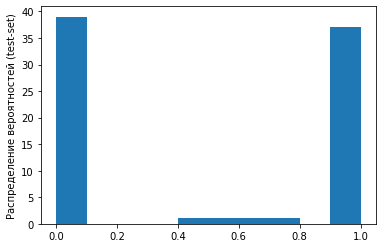

                          features  importances
2                       y__minimum     0.899965
4            y__standard_deviation     0.090489
5   y__binned_entropy__max_bins_10     0.003060
0                       y__maximum     0.002547
13                     y__skewness     0.002005
8     y__first_location_of_maximum     0.001313
14                   y__abs_energy     0.000621
1                          y__mean     0.000000
3                        y__median     0.000000
6              y__count_above_mean     0.000000
7              y__count_below_mean     0.000000
9     y__first_location_of_minimum     0.000000
10                  y__mean_change     0.000000
11                   y__sum_values     0.000000
12                     y__kurtosis     0.000000

   Neg  Pos
0   40    0
1    0   40
AUC = 1.000  Точность = 1.000


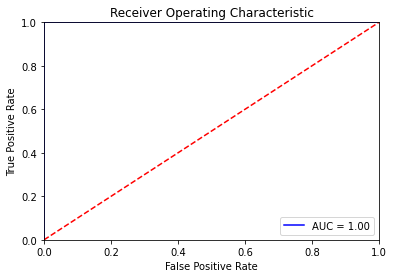

In [46]:
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train: ', trainSet.label.value_counts())
print()
print('Value counts test: ', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['index', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()
## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Neg', 'Pos'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"AUC = {roc_auc:.3f}  Точность = {acc:.3f}")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc=
'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
res

,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label,pred,pred_proba
95,95,3.050131,2.481445,1.981698,2.422754,0.390341,2.118493,29.0,32.0,0.934426,0.000000,0.017600,151.368172,-1.551327,0.192951,384.906200,0,0,0.00
15,15,3.234061,2.324856,1.957849,2.080959,0.449569,1.740542,22.0,39.0,0.245902,0.983607,-0.002561,141.816218,-0.742584,0.901602,342.031129,0,0,0.00
30,30,3.749894,2.819389,1.977846,2.722874,0.672196,2.052651,29.0,32.0,0.114754,0.983607,-0.027359,171.982739,-1.645054,0.145572,512.448962,0,0,0.00
158,158,3.377654,1.977230,0.539037,2.101336,1.063940,2.082609,31.0,30.0,0.754098,0.196721,0.019508,120.611013,-1.684211,-0.051198,307.525689,1,1,1.00
128,128,3.360246,3.169623,2.712135,3.223186,0.177204,2.008597,35.0,26.0,0.426230,0.983607,-0.004192,193.346994,-0.151933,-0.882463,614.752531,1,1,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,3.262822,1.737304,0.652959,1.502550,0.917289,2.121092,26.0,35.0,0.032787,0.672131,-0.023300,105.975558,-1.286156,0.456195,235.438375,1,1,1.00
26,26,3.518411,2.626653,1.958614,2.557926,0.572664,2.056689,29.0,32.0,0.278689,0.983607,-0.008452,160.225806,-1.516214,0.228997,440.862147,0,0,0.00
139,139,3.432932,1.997832,0.482741,2.156076,1.125577,2.040042,32.0,29.0,0.213115,0.819672,-0.027205,121.867773,-1.708823,-0.091584,320.753741,1,1,1.00
100,100,3.861705,2.598808,0.316597,3.028958,1.199469,2.013578,35.0,26.0,0.786885,0.000000,0.052355,158.527263,-1.186904,-0.572090,499.744100,1,1,1.00


In [44]:
## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

   Pos  Neg
0   40    0
1    0   40


Задание 8.19.3

Посчитайте те же четыре фичи (max, min, mean, median), а также "count_below_mean" при помощи пакета TSFresh, результат запишите в дейтафрейм features. Укажите значение count_below_mean для ряда с id == 4. Ответ округлите до целого числа.

In [41]:
features

,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label
0,0,3.231294,2.143130,1.957849,1.957977,0.364303,1.078767,14.0,47.0,0.655738,0.000000,3.188654e-09,130.730901,2.646297,1.988766,288.268959,0
1,1,3.634548,2.972939,2.052910,3.143508,0.560193,2.116654,34.0,27.0,0.229508,0.983607,-1.981077e-02,181.349254,-1.475921,-0.345283,558.282988,0
2,2,3.379718,2.246776,1.957849,1.958426,0.487925,1.230371,16.0,45.0,0.918033,0.000000,1.981853e-02,137.053366,0.455047,1.455200,322.450621,0
3,3,3.463092,2.339297,1.957850,1.998222,0.534249,1.522722,20.0,41.0,0.032787,0.983607,-2.469023e-02,142.697119,-0.293619,1.146074,351.221692,0
4,4,3.606816,2.354036,1.957850,1.986966,0.576762,1.470082,19.0,42.0,0.032787,0.983607,-2.711630e-02,143.596184,-0.084467,1.227646,358.322497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2.372536,1.203662,0.714004,1.008454,0.497025,1.966071,22.0,39.0,0.983607,0.311475,2.015918e-02,73.423381,-0.350449,0.959514,103.445977,1
196,196,1.003554,0.922809,0.847096,0.921486,0.045949,2.298680,30.0,31.0,0.983607,0.000000,2.607627e-03,56.291333,-1.196958,0.070687,52.074923,1
197,197,1.960760,1.305666,0.828983,1.257858,0.343661,2.248689,28.0,33.0,0.983607,0.000000,1.886294e-02,79.645636,-1.170729,0.322918,111.194904,1
198,198,3.298036,2.110081,0.618728,2.270264,0.938562,2.145111,33.0,28.0,0.639344,0.049180,1.549285e-02,128.714958,-1.348916,-0.317441,325.333862,1
